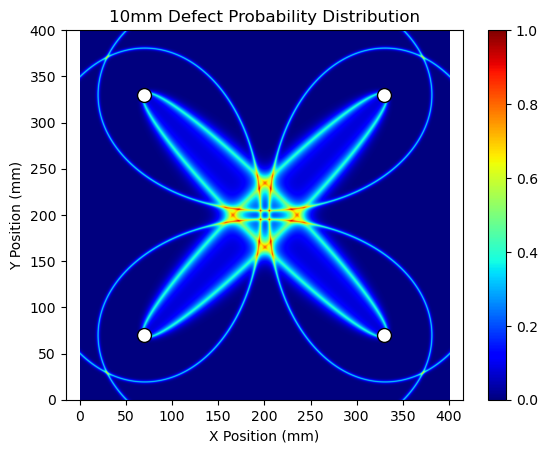

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
plate_size = 400  # plate size (mm)
mesh_size = 0.25  # mesh size (mm)
tau_0 = 0.7e-6    # attenuation factor (s)
v = 2830          # velocity (m/s)

# Discretization of plate
x = np.arange(0, plate_size + mesh_size, mesh_size)
y = np.arange(0, plate_size + mesh_size, mesh_size)
X, Y = np.meshgrid(x, y)

# D1 Sensor positions
sensor_positions = np.array([
      [70, 70],   # Top-left
   [70, 330],    # Top-right
    [330, 330],   # Bottom-right
    [330, 70]   # Bottom-left   # Bottom-left
])

# Path pairs
path_pairs = np.array([
    [1, 2], [1, 3], [1, 4],
    [2, 1], [2, 3], [2, 4],
    [3, 1], [3, 2], [3, 4],
    [4, 1], [4, 2], [4, 3]
]) - 1  # Convert to 0-based indexing

# TOF simulation (assuming Ellips.xlsx is not available, placeholder for data)
# Replace with actual data loading if file is available
TOF_experimental = np.loadtxt("Center_Defect_10mm.csv")  # Example, adjust as needed

# Initialize probability matrix
p = np.zeros_like(X)

# Calculate the probability values at each node
for i in range(len(path_pairs)):
    # The sensors of start points and end points
    p_start = path_pairs[i, 0]
    p_end = path_pairs[i, 1]
    
    # The coordinates for start point and end point
    sensor_start = sensor_positions[p_start, :]
    sensor_end = sensor_positions[p_end, :]
    
    # The distance between nodes and sensor
    distance_start = np.sqrt((X - sensor_start[0])**2 + (Y - sensor_start[1])**2)
    distance_end = np.sqrt((sensor_end[0] - X)**2 + (sensor_end[1] - Y)**2)
    
    # Theoretical TOF
    T_TH = (distance_start + distance_end) / (v * 1e3)  # unit m/s
    
    # Equation
    delta_T = np.abs(T_TH - TOF_experimental[i])
    
    # Cumulative probability value
    p += np.exp(-delta_T / tau_0)

# Normalize probability values
p = p / np.max(p)

# Plot probability distribution
plt.figure()
plt.imshow(p, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='jet')
plt.colorbar()
plt.scatter(sensor_positions[:, 0], sensor_positions[:, 1], c='white', s=100, edgecolors='black', marker='o')
plt.xlabel('X Position (mm)')
plt.ylabel('Y Position (mm)')
plt.title('10mm Defect Probability Distribution')
plt.axis('equal')
plt.savefig('defect_probability.png')


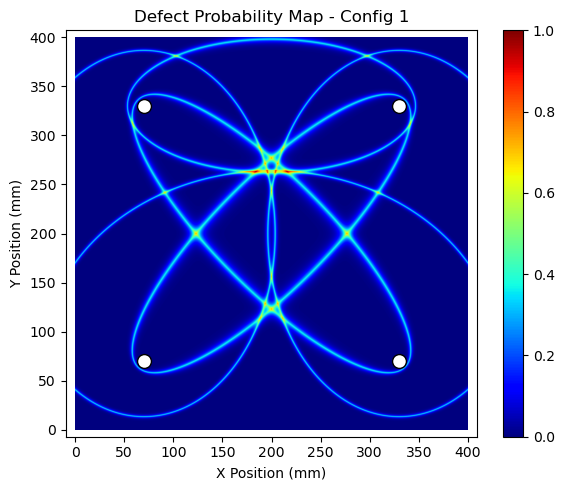

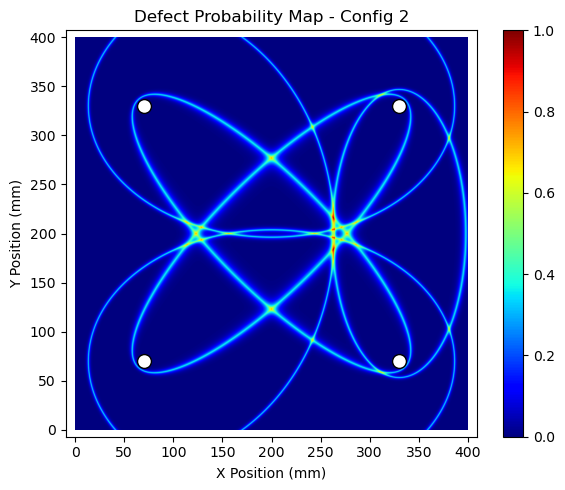

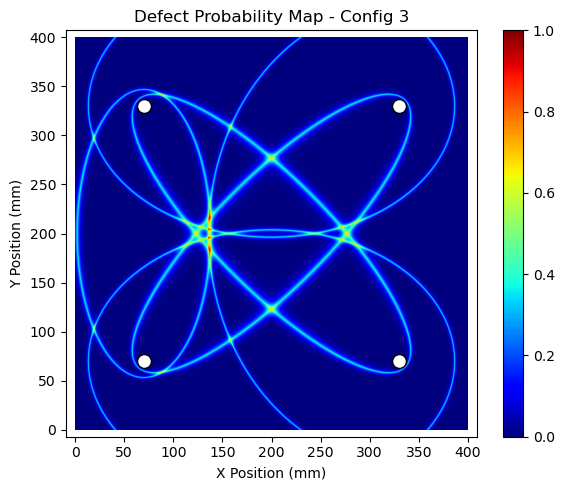

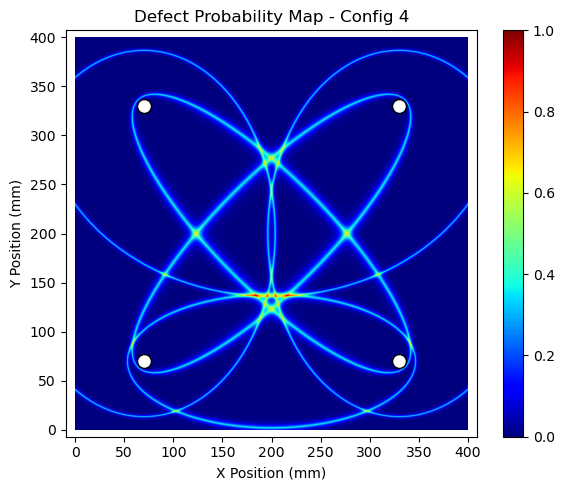

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Settings
plate_size = 400  # plate size (mm)
mesh_size = 0.25  # mesh size (mm)
tau_0 = 0.7e-6    # attenuation factor (s)
v = 2865          # wave velocity (m/s)

# Discretization of plate
x = np.arange(0, plate_size + mesh_size, mesh_size)
y = np.arange(0, plate_size + mesh_size, mesh_size)
X, Y = np.meshgrid(x, y)

# Corrected sensor configurations
sensor_configs = [
    np.array([[70, 70], [70, 330], [330, 330], [330, 70]]),
    np.array([[70, 330], [330, 330], [330, 70], [70, 70]]),
    np.array([[330, 70], [70, 70], [70, 330], [330, 330]]),
    np.array([[330, 330], [330, 70], [70, 70], [70, 330]])
]

# Load TOF experimental data
TOF_experimental = np.loadtxt("Side_Defect_10mm.csv")  # Ensure this matches expected path count

# Iterate through each sensor configuration
for idx, sensor_positions in enumerate(sensor_configs):
    num_sensors = sensor_positions.shape[0]

    # Create all unique paths (excluding self-paths)
    path_pairs = np.array([[i, j] for i in range(num_sensors) for j in range(num_sensors) if i != j])

    # Initialize probability matrix
    p = np.zeros_like(X)

    for i, (p_start, p_end) in enumerate(path_pairs):
        sensor_start = sensor_positions[p_start]
        sensor_end = sensor_positions[p_end]

        # Distance to and from point
        d1 = np.sqrt((X - sensor_start[0])**2 + (Y - sensor_start[1])**2)
        d2 = np.sqrt((X - sensor_end[0])**2 + (Y - sensor_end[1])**2)
        T_TH = (d1 + d2) / (v * 1e3)  # convert mm to m

        # Ensure enough TOF data
        if i >= len(TOF_experimental):
            print(f"Warning: Not enough TOF data for config {idx+1}, path {i+1}")
            continue

        delta_T = np.abs(T_TH - TOF_experimental[i])
        p += np.exp(-delta_T / tau_0)

    # Normalize
    p = p / np.max(p)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.imshow(p, extent=[x[0], x[-1], y[0], y[-1]], origin='lower', cmap='jet')
    plt.colorbar()
    plt.scatter(sensor_positions[:, 0], sensor_positions[:, 1], c='white', s=100, edgecolors='black')
    plt.title(f'Defect Probability Map - Config {idx+1}')
    plt.xlabel('X Position (mm)')
    plt.ylabel('Y Position (mm)')
    plt.axis('equal')
    plt.tight_layout()
    
    #plt.show()  # show the plot

